In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Kmeans algorithm

In [10]:
X, y_true = make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.60,random_state=42)
df = pd.DataFrame(X,columns=['feature_1','feature_2'])

In [29]:
df.head(3)

,feature_1,feature_2
0,-7.155244,-7.390016
1,-7.395875,-7.110843
2,-2.015671,8.281780


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [17]:
inertia = []
K_range = range(1,11)

In [19]:
for k in K_range: 
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [30]:
# inertia

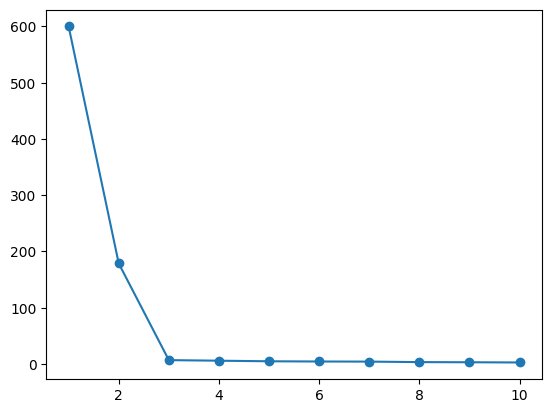

In [34]:
plt.plot(K_range,inertia,marker="o")

In [35]:
kmeans_final = KMeans(n_clusters=3,random_state=42)

In [36]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [40]:
df['cluster']=cluster_labels 

<Axes: xlabel='feature_1', ylabel='feature_2'>

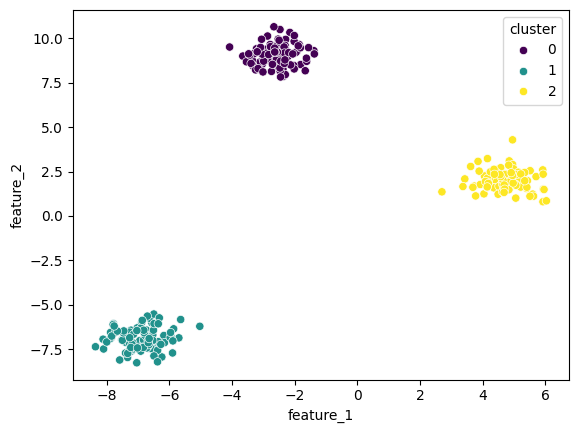

In [46]:
sns.scatterplot(x=df['feature_1'],
               y=df['feature_2'],
               hue=df['cluster'], 
                palette='viridis')

# Disadvantage of KMeans

In [47]:
from sklearn.datasets import make_moons

In [48]:
X, y_true = make_moons(n_samples=500,noise=0.05,random_state=42)

In [49]:
from sklearn.cluster import KMeans,DBSCAN

In [51]:
df = pd.DataFrame(X,columns=['Feature_1','Features_2'])

In [55]:
scaler = StandardScaler()

In [57]:
X_scaled = scaler.fit_transform(df)

In [60]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [61]:
df['kmean_cluster'] = kmeans_labels

### disadvantage

<Axes: xlabel='Feature_1', ylabel='Features_2'>

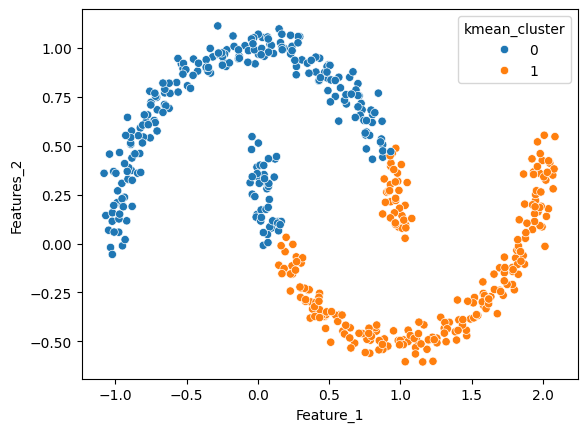

In [64]:
sns.scatterplot(x=df['Feature_1'],y=df['Features_2'],hue=df['kmean_cluster'],palette='tab10')

# DB Scan Algorithm

In [66]:
dbscan = DBSCAN(eps=0.3,min_samples=5)
dbscan_label = dbscan.fit_predict(X_scaled)

In [67]:
df['dbcluster'] = dbscan_label

<Axes: xlabel='Feature_1', ylabel='Features_2'>

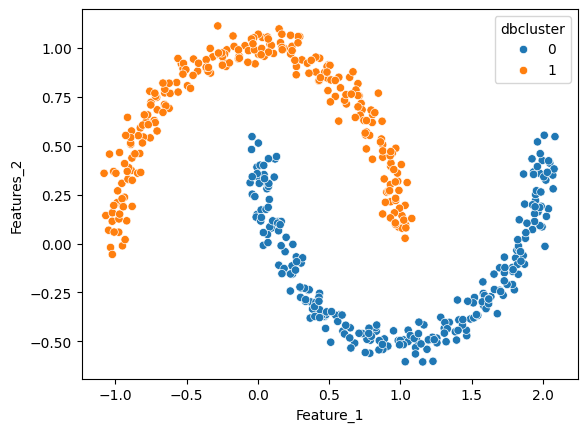

In [68]:
sns.scatterplot(x=df['Feature_1'],y=df['Features_2'],hue=df['dbcluster'],palette='tab10')